# MNIST, the "Hello World" of Computer Vision

After Cat vs. Dog, this is the next challenge for me in computer vision. Building on [chaper 4](https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb) of the book, I would like to implement the whole [MNIST](https://en.wikipedia.org/wiki/MNIST_database), as recommended as futher research and as also avaiblable as a [Kaggle competition](https://www.kaggle.com/competitions/digit-recognizer/data).

Again, the way to implement will be the following (like with the [Titanic-Challenge](https://chrwittm.github.io/posts/2022-11-05-kaggle-titanic/):
* Implement a Fast.AI version to get a feeling of the data and also to get a result quickly
* Implement a from-scrach version for additonal learnings and insights

In [1]:
from fastai.vision.all import *

## Downloading the dataset

### From Kaggle

Let's download the dataset from Kaggle. Uncomment the next line of you do not have it on your machine yet:

In [2]:
#!kaggle competitions download -c digit-recognizer

In [3]:
#!unzip digit-recognizer.zip

As presented in the book, let's do all the file manipulation directly from the notebook:

In [4]:
path = Path('.')
Path.BASE_PATH = path

In [5]:
path.ls()

(#6) [Path('.ipynb_checkpoints'),Path('digit-recognizer.zip'),Path('MNIST01.ipynb'),Path('sample_submission.csv'),Path('test.csv'),Path('train.csv')]

This is a bit of a surprise that we get a csv file for the images...
Need to construct an image...
Also rearanging the images seems to be a good exercise...

### From Fast.AI

As a comparison, let's quickly download the Fast.AI version:

In [6]:
path = untar_data(URLs.MNIST)

In [7]:
path.ls()

(#2) [Path('/home/chrwittm/.fastai/data/mnist_png/training'),Path('/home/chrwittm/.fastai/data/mnist_png/testing')]

Next: Start with the Fast.AI version, because that will yield quicker results, taking the images and training a model should be no overly difficult...

Afterwards: Use the kaggle data to convert it and run the same thing

Afterwards: Train your own model

## Creating a quick model

with this dataset, let's create a qick model.

In [12]:
path

Path('/home/chrwittm/.fastai/data/mnist_png')

In [14]:
(path/'training')

Path('/home/chrwittm/.fastai/data/mnist_png/training')

In [13]:
(path/'training').ls()

(#10) [Path('/home/chrwittm/.fastai/data/mnist_png/training/4'),Path('/home/chrwittm/.fastai/data/mnist_png/training/7'),Path('/home/chrwittm/.fastai/data/mnist_png/training/9'),Path('/home/chrwittm/.fastai/data/mnist_png/training/5'),Path('/home/chrwittm/.fastai/data/mnist_png/training/8'),Path('/home/chrwittm/.fastai/data/mnist_png/training/0'),Path('/home/chrwittm/.fastai/data/mnist_png/training/2'),Path('/home/chrwittm/.fastai/data/mnist_png/training/1'),Path('/home/chrwittm/.fastai/data/mnist_png/training/6'),Path('/home/chrwittm/.fastai/data/mnist_png/training/3')]

In [15]:
path = (path/'training')

In [16]:
path

Path('/home/chrwittm/.fastai/data/mnist_png/training')

In [17]:
mnist1 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    #item_tfms=[Resize(192, method='squish')]
)

In [19]:
dls = mnist1.dataloaders(path, bs=32)

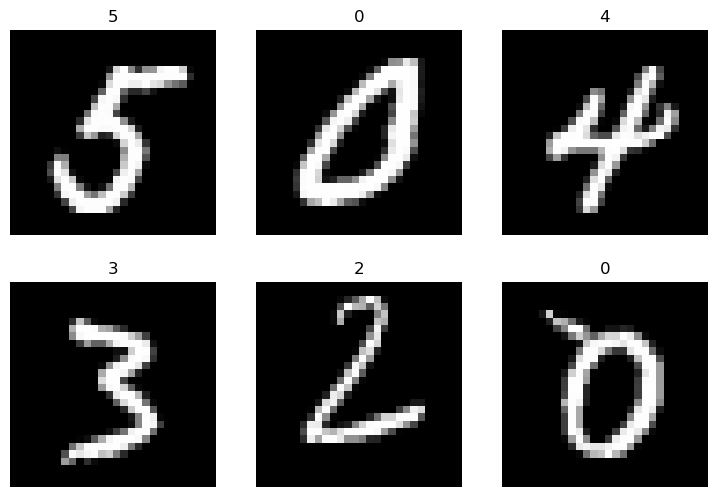

In [20]:
dls.show_batch(max_n=6)

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/chrwittm/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/chrwittm/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.735326,0.490543,0.154583,04:19


epoch,train_loss,valid_loss,error_rate,time
0,0.180698,0.080725,0.024417,10:29
1,0.072823,0.041142,0.011833,13:02
2,0.033182,0.033746,0.010000,12:27


## Benchmarking

Running the training on my local machine took about 40 minutes:

![CPU](benchmark-cpu.png)